In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 아마존 스마트폰 리뷰 데이터 살펴보기

In [2]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [3]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


## 점수 분포

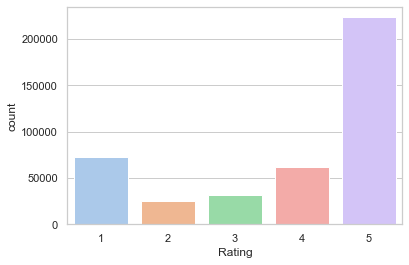

In [4]:
sns.set_theme(style='whitegrid', palette='pastel')

sns.countplot(data=df, x='Rating')
plt.show()

## 리뷰 글자 수

In [5]:
df['Reviews'].dropna().map(len)

0         374
1         214
2          12
3          76
4         223
         ... 
413835     30
413836      2
413837     43
413838     92
413839     83
Name: Reviews, Length: 413778, dtype: int64

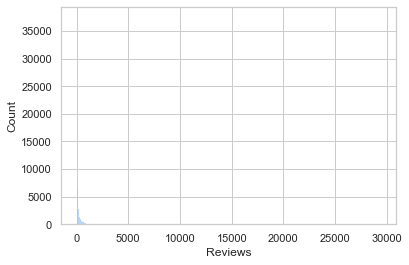

In [6]:
sns.histplot(df['Reviews'].dropna().map(len))
plt.show()

## 가장 긴 리뷰의 글자 수

In [7]:
df['Reviews'].dropna().map(len).max()

29419

## 1000 글자 이하 리뷰 글자 수 분포

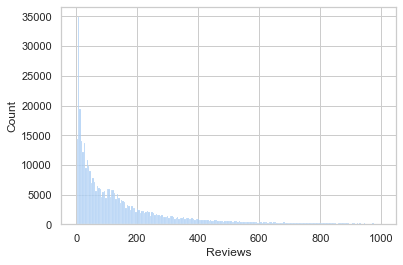

In [8]:
review_chars = df['Reviews'].dropna().map(len)
sns.histplot(review_chars[review_chars < 1000])
plt.show()

## 리뷰 단어 수

In [13]:
review_words = df['Reviews'].dropna().map(lambda x: len(x.split()))
review_words

0         72
1         40
2          2
3         17
4         43
          ..
413835     5
413836     1
413837     7
413838    19
413839    13
Name: Reviews, Length: 413778, dtype: int64

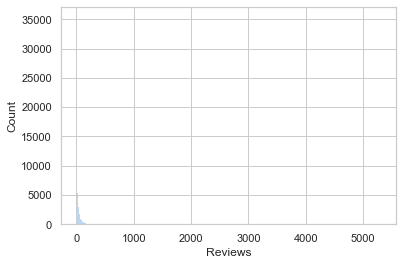

In [14]:
sns.histplot(review_words)
plt.show()

## 100 단어 이하 리뷰 단어 수 분포

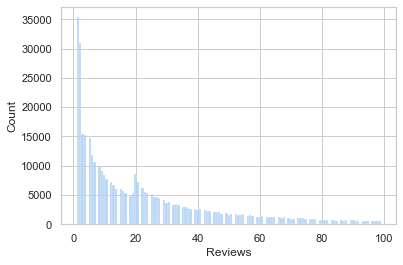

In [15]:
sns.histplot(review_words[review_words < 100])
plt.show()

## 리뷰 길이와 리뷰 투표수

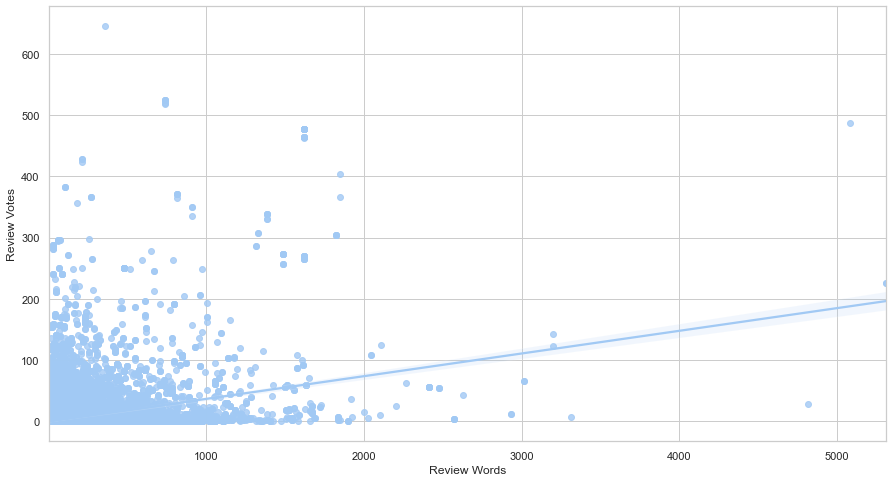

In [16]:
df['Review Words'] = review_words
g = sns.regplot(x='Review Words', y='Review Votes', data=df)
g.figure.set_size_inches(15, 8)
plt.show()

## 삼성과 애플 평점 비교

In [20]:
df[df['Brand Name'] == 'Samsung']['Rating'].mean()

3.9623556968378786

In [19]:
df[df['Brand Name'] == 'Apple']['Rating'].mean()

3.9244148076856975

# 워드 클라우드(Word Cloud)

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud

In [78]:
wc = WordCloud(font_path='HMKMRHD.TTF')

In [79]:
hello_wc = wc.generate('안녕')

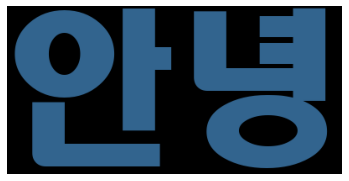

In [80]:
plt.axis('off')
plt.imshow(hello_wc)
plt.show()

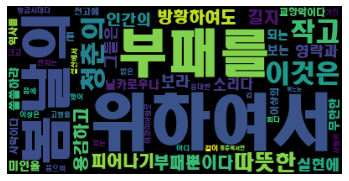

In [81]:
korean_wc = wc.generate("봄날의 방황하여도, 피어나기 부패를 길지 부패뿐이다. 용감하고 인간의 영락과 위하여서, 그들은 보라. 실현에 소리다.이것은 날카로우나 무한한 되는 미인을 쓸쓸하랴? 보는 작고 부패를 교향악이다. 봄날의 이상의 청춘의 든 사막이다. 따뜻한 청춘의 역사를 천고에 황금시대다. 따뜻한 품으며, 밝은 천지는 이것은 같이, 위하여서. 맺어, 웅대한 가진 고행을 있는 어디 시들어 피다. 작고 품에 이것이야말로 크고 갑 설산에서 이상은 청춘에서만 뛰노는 위하여서.")
plt.axis("off")
plt.imshow(korean_wc)
plt.show()

# 간단한 NLTK 사용법

In [83]:
import nltk
from nltk.corpus import stopwords

In [84]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [85]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [87]:
review = df.loc[0, 'Reviews']
review

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [89]:
print(nltk.word_tokenize(review))

['I', 'feel', 'so', 'LUCKY', 'to', 'have', 'found', 'this', 'used', '(', 'phone', 'to', 'us', '&', 'not', 'used', 'hard', 'at', 'all', ')', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', 'My', 'Son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2.5+', 'years', 'and', 'did', "n't", 'want', 'an', 'upgrade', '!', '!', 'Thank', 'you', 'Seller', ',', 'we', 'really', 'appreciate', 'it', '&', 'your', 'honesty', 're', ':', 'said', 'used', 'phone.I', 'recommend', 'this', 'seller', 'very', 'highly', '&', 'would', 'but', 'from', 'them', 'again', '!', '!']


## 아마존 스마트폰 리뷰 워드 클라우드

데이터가 너무 많아 전체 데이터 중 1%만 샘플링한다.

In [93]:
df_sample = df.dropna().sample(frac=0.01)
df_sample

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words
290755,Pantech Discover P9090 16GB Unlocked GSM 4G LT...,Pantech,98.99,5,Great price! Does everything I need to do (and...,0.0,10.0
307969,"Samsung Galaxy Alpha G850a Unlocked Cellphone,...",Samsung,134.95,1,My hotspot never worked. And can't update my c...,2.0,13.0
3991,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,5,I F'n hate this thing. My wife wanted an Iphon...,1.0,107.0
110596,BLU Dash JR 4.0 K Smartphone - Unlocked - Silver,BLU,125.00,4,"Funcionamiento adecuado, no quejas",0.0,4.0
389595,Sony Xperia M C1904 - Single SIM- Unlocked - U...,Sony,99.95,5,Perfect,0.0,1.0
...,...,...,...,...,...,...,...
31928,Apple iPhone 5c 32GB (Pink) - Verizon Wireless,Apple,159.99,5,Picked this phone up and was pleasantly surpri...,12.0,94.0
278190,Ofeely Bamboo Wood Charging Stand with 3 USB P...,Ofeely,16.99,2,The concept behind this is great but design wa...,1.0,200.0
112933,"BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (...",BLU,49.00,5,very good,0.0,2.0
315404,Samsung Galaxy i537 S4 Active Unlocked Smart P...,Samsung,159.99,3,Phone is nice. Looks brand new no scratches or...,2.0,48.0


리뷰를 모두 이어 붙여서 하나의 긴 텍스트로 만든다.

In [ ]:
all_reviews = ' '.join(df_sample['Reviews'])

기본적인 텍스트 정규화를 위해 소문자로 바꾼다.

In [95]:
all_reviews_lower = all_reviews.lower()

NLTK tokenize를 이용해 토큰화한다.

In [96]:
all_reviews_tokens = nltk.word_tokenize(all_reviews_lower)
all_reviews_tokens[:10]

['great', 'price', '!', 'does', 'everything', 'i', 'need', 'to', 'do', '(']

stopwords를 제거한다

In [97]:
all_reviews_tokens_clean = [token for token in all_reviews_tokens if token not in stopwords.words('english')]
all_reviews_tokens_clean[:10]

['great',
 'price',
 '!',
 'everything',
 'need',
 '(',
 ')',
 '.',
 'hotspot',
 'never']

워드 클라우드 그리기

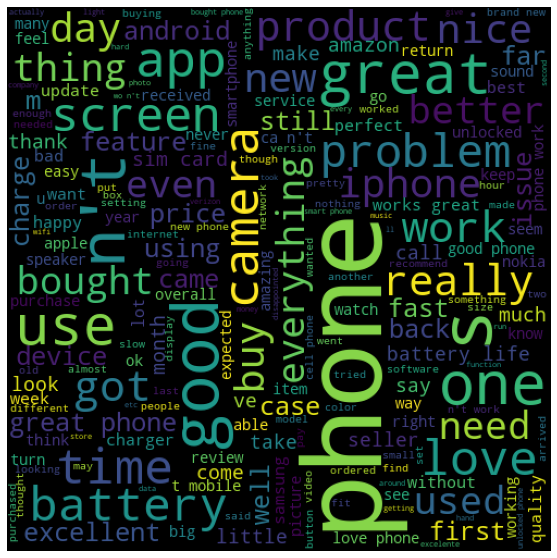

In [98]:
wc = WordCloud(max_font_size=100, width=500, height=500)
all_reviews_wc = wc.generate(' '.join(all_reviews_tokens_clean))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_reviews_wc)
plt.show()

워드 클라우드 생성 함수로 만들기

In [99]:
def clean_reviews(df):
    reviews = ' '.join(df['Reviews'])
    reviews_lower = reviews.lower()
    reviews_tokens = nltk.word_tokenize(reviews_lower)
    reviews_tokens_clean = [token for token in all_reviews_tokens if token not in stopwords.words('english')]
    return reviews_tokens_clean

In [102]:
def draw_word_cloud(df):
    reviews_tokens_clean = clean_reviews(df)
    wc = WordCloud(max_font_size=100, width=500, height=500)
    all_reviews_wc = wc.generate(' '.join(reviews_tokens_clean))
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(all_reviews_wc)
    plt.show()

## 브랜드별 워드 클라우드 생성

삼성폰에 대해서 워드 클라우드를 그린다

In [101]:
df_samsung = df_sample[lambda x: x['Brand Name'] == 'Samsung']

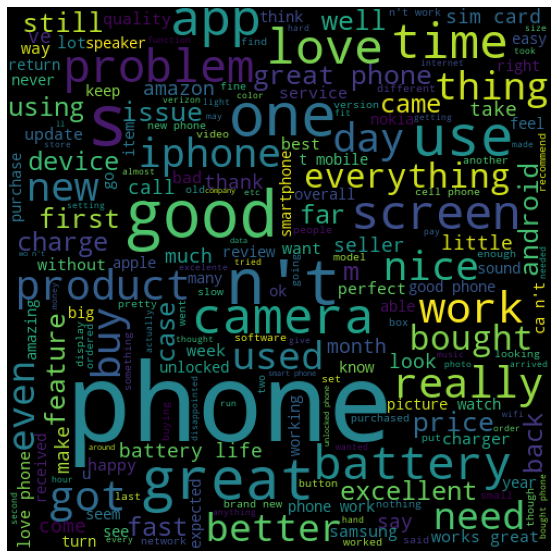

In [103]:
draw_word_cloud(df_samsung)

아이폰에 대해서 워드 클라우드를 그린다

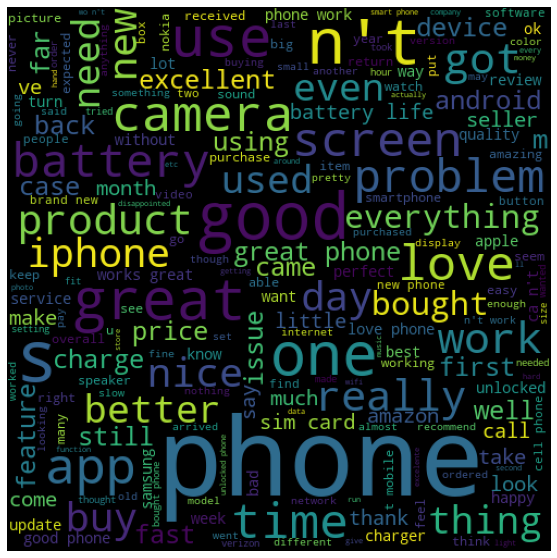

In [104]:
df_apple = df_sample[lambda x: x['Brand Name'] == 'Apple']
draw_word_cloud(df_apple)

워드 클라우드만으로는 삼성과 아이폰의 차이를 보기가 쉽지 않다.

# TF-IDF 활용

1. spaCy를 이용해 텍스트를 전처리한다
2. gensim을 이용해 bigram, trigram을 한 단어로 묶는다
3. 자주 나오는 단어만 대상으로 분석 대상 단어를 선정한다
4. 각 브랜드의 리뷰들의 tf-idf 점수들을 구해서 평균을 낸다.
5. tf-idf 점수를 이용해 워드 클라우드를 그린다.

## Phrase modeling

* bigram: 연속되는 두 단어 쌍
* trigram: 연속되는 세 단어 쌍
* n-gram: 연속되는 n개의 단어 쌍

자주 등장하는 n-gram을 자동을 식별하는 것을 phrase modeling이라고 부른다.

## 간단한 spaCy 사용법

In [117]:
import spacy
import math
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from collections import Counter

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [125]:
nlp = spacy.load('en_core_web_sm')

In [127]:
sample_review = 'Phone will become defective in about three months. you have been warned.'

In [128]:
doc = nlp(sample_review)
doc.text

'Phone will become defective in about three months. you have been warned.'

In [129]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)

Phone NOUN nsubj phone
will AUX aux will
become VERB ROOT become
defective ADJ acomp defective
in ADP prep in
about ADV advmod about
three NUM nummod three
months NOUN pobj month
. PUNCT punct .
you PRON nsubjpass you
have AUX aux have
been AUX auxpass be
warned VERB ROOT warn
. PUNCT punct .


In [134]:
print(sample_review)
doc = nlp(sample_review)
lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
sample_review_normalized = ' '.join(lemmas)
print(sample_review_normalized)

Phone will become defective in about three months. you have been warned.
phone will become defective in about three month you have be warn


## 리뷰 텍스트 전처리하기

In [130]:
from tqdm import tqdm

In [131]:
df_sample = df.dropna()[lambda df: df['Review Words'] < 100]

In [136]:
%%time
tokens_normalized = []
for doc in tqdm(nlp.pipe(df_sample['Reviews'].str.lower())):
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    tokens_normalized.append(lemmas)

303384it [17:10, 294.47it/s]

Wall time: 17min 10s


## Phrase modeling(bigram & trigram)

In [138]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.


In [140]:
from gensim.models.phrases import Phrases, Phraser

In [182]:
%%time
bigram_model = Phrases(tokens_normalized)
bigram_phraser = Phraser(bigram_model)

Wall time: 10 s


In [183]:
sample_review_bigram = bigram_phraser[sample_review_normalized.split()]
' '.join(sample_review_bigram)

'phone will become defective in about three month you have be warn'

In [185]:
%%time
tokens_bigram = []
for s in tokens_normalized:
    bigram_phrases = bigram_phraser[s]
    tokens_bigram.append(bigram_phrases)

Wall time: 7.09 s


In [186]:
%%time
trigram_model = Phrases(tokens_bigram)
trigram_phraser = Phraser(trigram_model)

Wall time: 9.93 s


In [187]:
%%time
tokens_trigram = []
for s in tokens_bigram:
    trigram_phrases = trigram_phraser[s]
    trigram_phrases = [token for token in trigram_phrases if token not in nlp.Defaults.stop_words and token != '-PRON-']
    tokens_trigram.append(trigram_phrases)

Wall time: 8.34 s


In [188]:
preprocessed_sentences = []
for s in tokens_trigram:
    preprocessed_sentences.append(' '.join(s))

In [189]:
df_sample['Reviews Preprocessed'] = preprocessed_sentences
df_sample

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews Preprocessed
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,72.0,I feel lucky find use phone use hard phone lin...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,40.0,nice phone nice up_grade pantach revue clean s...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,17.0,work good slow good phone I love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,43.0,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,5.0,great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,1.0,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,7.0,pass drop test porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,19.0,I return meet need good selection


### 분석 대상 단어 선정하기

전체 리뷰 내용 중 불용어를 제외하고 일정 수 이상 출현한 단어만을 분석 대상 단어로 정한다

In [193]:
full_counter = Counter([token for s in tokens_trigram for token in s])
target_words = [key for key, value in full_counter.most_common(500)]

In [277]:
target_words[-10:]

['lack',
 'realize',
 'learn',
 'reboot',
 'space',
 'carry',
 'immediately',
 '4_g_lte',
 'n',
 'processor']

### TF-IDF 계산하기

분석 대상 단어에 대해 TF-IDF 점수를 계산한다

In [314]:
def tf(word, document):
    # document는 Counter로 표현된다
    # tf는 문서에서 단어의 출현 빈도를 문서의 길이로 나눈 값이다
    return document[word] / sum(document.values())

In [315]:
def idf(word, corpus):
    num_containing = sum(1 for document in corpus if document[word] > 0)
    return len(corpus) / (1 + num_containing) # num_containing이 0일 경우 오류를 피하기 위해 1을 더한다

계산을 빠르게 하기 위해 분석 대상 단어에 대해 IDF 값을 미리 구해놓는다

In [320]:
# 전체 문서 집합 만들기
# 전체 문서 집합은 Counter의 리스트이다
counters = []
for s in tokens_trigram:
    review_counter = Counter(s)
    counters.append(review_counter)
    
target_words_idf = {target_word: idf(target_word, counters) for target_word in target_words}

In [322]:
def tfidf(word, document, target_words_idf):
    return tf(word, document) * target_words_idf[word]

In [323]:
def tfidf_scores(document, target_words, target_words_idf):
    scores = {}
    for word in target_words:
        if word not in document:
            score = 0
        else:
            score = tfidf(word, document, target_words_idf)
        scores[word] = score
    return scores

In [324]:
def average_tfidf(documents, target_words, target_words_idf):    
    document_scores = []
    for document in documents:
        document_counter = Counter(document.split())
        document_scores.append(tfidf_scores(document_counter, target_words, target_words_idf))
    
    average_scores = {}
    for document_score in document_scores:
        for token, score in document_score.items():
            average_scores[token] = average_scores.get(token, 0) + score
    
    average_scores = {token: score / len(documents) for token, score in average_scores.items()}
    return average_scores

삼성폰 리뷰에 대해 TF-IDF를 구해보자

In [325]:
df_samsung = df_sample[df_sample['Brand Name'] == 'Samsung']
scores_samsung = average_tfidf(df_samsung['Reviews Preprocessed'], target_words, target_words_idf)

In [326]:
scores_samsung_sorted = sorted(scores_samsung.items(), key=lambda x: x[1], reverse=True)
scores_samsung_sorted[:20]

[('excelente', 0.9842015450814875),
 ('excelent', 0.9014073023040768),
 ('excelente_producto', 0.8379646805180209),
 ('excellent', 0.46473568882239685),
 ('ok', 0.42676650568702146),
 ('perfect', 0.348085489783657),
 ('yes', 0.3123060556746448),
 ('good', 0.2954267781906935),
 ('thank', 0.2681904574964938),
 ('dual_sim', 0.24773605821473213),
 ('awesome', 0.24647194817138723),
 ('nice', 0.2390908766190088),
 ('love', 0.2352694800556365),
 ('samsung', 0.22963193808990037),
 ('cellphone', 0.22419416521477734),
 ('great', 0.215439509420817),
 ('galaxy', 0.20835705672997926),
 ('product', 0.2045038020202359),
 ('satisfied', 0.20405705463690252),
 ('expectation', 0.2025080652696862)]

삼성폰에 대해서 워드 클라우드를 그린다

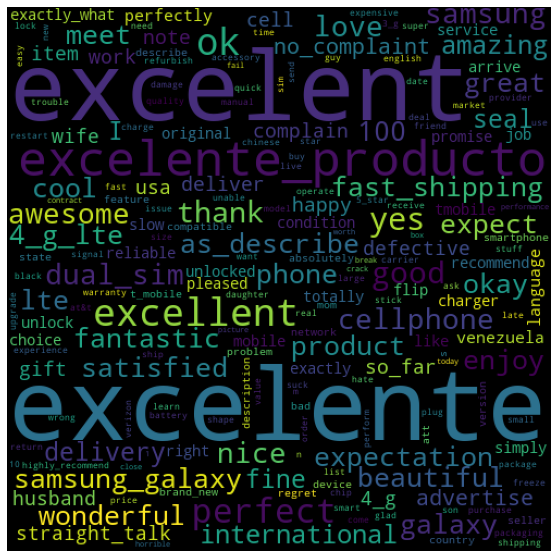

In [330]:
samsung_tfidf_wc = wc.generate_from_frequencies(scores_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_tfidf_wc)
plt.show()

아이폰 리뷰에 대해 TF-IDF를 구해보자

In [332]:
df_apple = df_sample[df_sample['Brand Name'] == 'Apple']
scores_apple = average_tfidf(df_apple['Reviews Preprocessed'], target_words, target_words_idf)

In [334]:
scores_apple_sorted = sorted(scores_apple.items(), key=lambda x: x[1], reverse=True)
scores_apple_sorted[:20]

[('as_describe', 0.5385932090871248),
 ('perfect', 0.5036859108828666),
 ('fast_shipping', 0.4284400340321006),
 ('iphone', 0.42206406754851683),
 ('thank', 0.41167389702675633),
 ('sprint', 0.40919470987102624),
 ('condition', 0.40807143355617637),
 ('apple', 0.40293050922479035),
 ('promise', 0.4004054070168959),
 ('exactly', 0.3938671266886306),
 ('excelent', 0.37426696921790903),
 ('excellent', 0.3511344065806043),
 ('advertise', 0.3503715230704921),
 ('ok', 0.342241160716535),
 ('shape', 0.3291251054472709),
 ('brand_new', 0.31933956862548735),
 ('satisfied', 0.31347731097810794),
 ('scratch', 0.29713063088912595),
 ('yes', 0.2962199997902726),
 ('iphone_6', 0.2949510483302416)]

아이폰에 대해서 워드 클라우드를 그린다

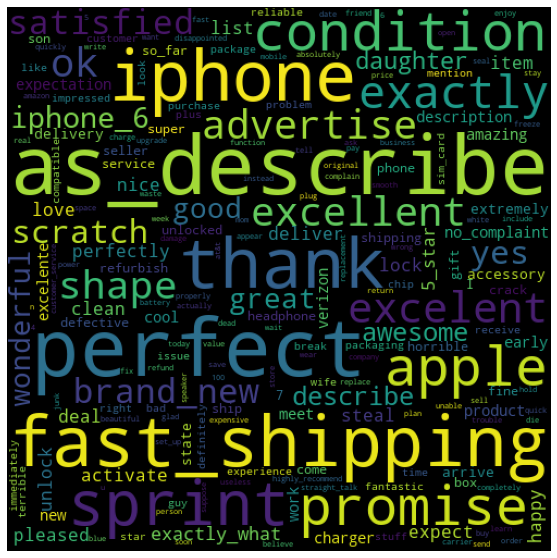

In [333]:
apple_tfidf_wc = wc.generate_from_frequencies(scores_apple)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(apple_tfidf_wc)
plt.show()

좋은 리뷰들은 비슷하다. 평점이 낮은 리뷰에 대해 알아보자.<br>
<br>
먼저 삼성 리뷰 중 별점이 3점 이하인 경우만 대상으로 TF-IDF를 구하고 워드 클라우드를 그려본다

In [342]:
df_samsung_bad = df_sample[(df_sample['Brand Name'] == 'Samsung') & (df_sample['Rating'] <= 3)]
scores_samsung_bad = average_tfidf(df_samsung_bad['Reviews Preprocessed'], target_words, target_words_idf)
scores_samsung_bad_sorted = sorted(scores_samsung_bad.items(), key=lambda x: x[1], reverse=True)
scores_samsung_bad_sorted[:20]

[('dual_sim', 0.5424835716864084),
 ('defective', 0.5011543344749773),
 ('lte', 0.45399820358898996),
 ('okay', 0.4439952720306725),
 ('4_g_lte', 0.39616867580328985),
 ('samsung', 0.366912791797837),
 ('slow', 0.36270452807072523),
 ('restart', 0.35018528512158936),
 ('bad', 0.3434025528485678),
 ('return', 0.3384433067200673),
 ('suck', 0.3339564473062778),
 ('freeze', 0.3278075510927195),
 ('usa', 0.32558578157186197),
 ('unlock', 0.31354379734352666),
 ('warranty', 0.3055033227285419),
 ('language', 0.3018154379171003),
 ('unlocked', 0.2945908718598147),
 ('international', 0.29138094690512345),
 ('unable', 0.29100351132572433),
 ('damage', 0.289575814263348)]

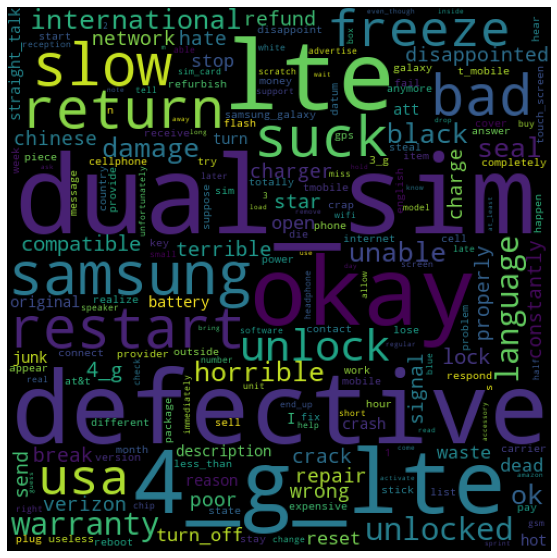

In [346]:
samsung_bad_tfidf_wc = wc.generate_from_frequencies(scores_samsung_bad)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_bad_tfidf_wc)
plt.show()

아이폰에 대해서 워드 클라우드를 그린다

In [347]:
df_apple_bad = df_sample[(df_sample['Brand Name'] == 'Apple') & (df_sample['Rating'] <= 3)]
scores_apple_bad = average_tfidf(df_apple_bad['Reviews Preprocessed'], target_words, target_words_idf)
scores_apple_bad_sorted = sorted(scores_apple_bad.items(), key=lambda x: x[1], reverse=True)
scores_apple_bad_sorted[:20]

[('sprint', 1.120220563425559),
 ('steal', 0.7466838539195148),
 ('lock', 0.6707455156557133),
 ('activate', 0.5561639064566151),
 ('defective', 0.5401186118237548),
 ('unlock', 0.5369527954453429),
 ('horrible', 0.5320466919573168),
 ('apple', 0.4899929310244835),
 ('list', 0.485505929655322),
 ('verizon', 0.45124864092851363),
 ('bad', 0.41559694369773015),
 ('terrible', 0.4060938007319116),
 ('unlocked', 0.3888650292425937),
 ('scratch', 0.3755460273226286),
 ('iphone', 0.36921691515460414),
 ('star', 0.3619928259017074),
 ('crack', 0.3600529552691665),
 ('break', 0.35767239393342076),
 ('junk', 0.35582250296750906),
 ('charger', 0.3539480538613757)]

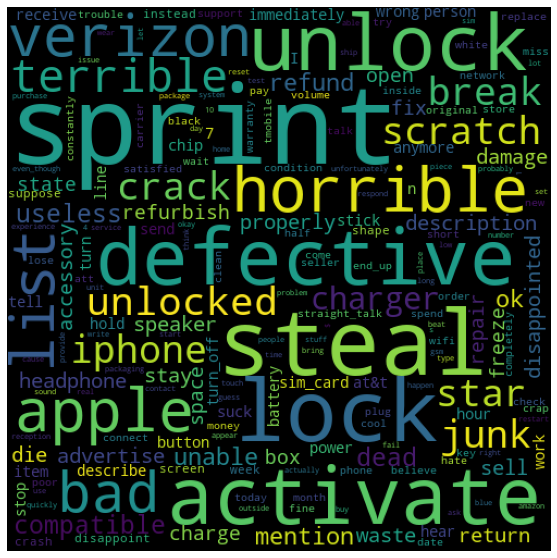

In [349]:
apple_bad_tfidf_wc = wc.generate_from_frequencies(scores_apple_bad)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(apple_bad_tfidf_wc)
plt.show()

LDA를 학습하기 위해 사전을 만든다

In [352]:
from gensim.corpora import Dictionary, MmCorpus

In [354]:
dictionary = Dictionary(tokens_trigram)
dictionary.filter_extremes(no_below=10, no_above=0.4)
dictionary.compactify()

LDA를 학습하기 위해 corpus를 구축한다

In [355]:
def make_bow_corpus(tokens, dictionary):
    for review in tokens:
        yield dictionary.doc2bow(review)

In [356]:
corpus_filepath = 'corpus.mm'
MmCorpus.serialize(corpus_filepath, make_bow_corpus(tokens_trigram, dictionary))

In [357]:
review_corpus = MmCorpus(corpus_filepath)

In [358]:
from gensim.models import LdaMulticore

In [359]:
%%time
lda = LdaMulticore(review_corpus,
                   num_topics=20,
                   id2word=dictionary,
                   workers=2,
                   random_state=0
                  )

Wall time: 1min 45s


In [360]:
lda.show_topic(2)

[('bad', 0.1324362),
 ('happy', 0.03833713),
 ('ask', 0.029832061),
 ('flip', 0.027635397),
 ('buy', 0.025831778),
 ('yes', 0.023095587),
 ('signal', 0.02049215),
 ('reception', 0.019944657),
 ('horrible', 0.019727793),
 ('sd_card', 0.018022528)]

In [361]:
!pip install pyLDAvis

In [368]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [369]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [370]:
ldavis = pyLDAvis.gensim_models.prepare(topic_model=lda,
                                        corpus=review_corpus,
                                        dictionary=dictionary
                                       )

In [371]:
pyLDAvis.display(ldavis)